# Kelompok Dicky Adi

## Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

## Import then print the train and test dataset

In [2]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

In [3]:
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
dfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Check for the null/nan values from both of the dataset(dataframe)

In [5]:
trainNan = dfTrain.isna().sum()
trainNanList = trainNan[trainNan > 0]
print(trainNanList)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
testNan = dfTest.isna().sum()
testNanList = testNan[testNan > 0]
print(testNanList)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


## Visualize the nan columns using histogram

Visualizing the training nan values

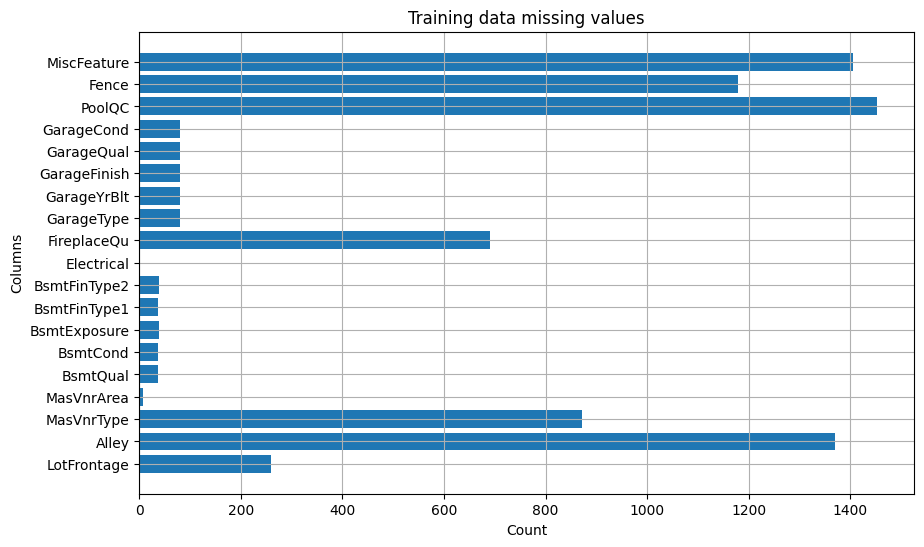

In [7]:
plt.figure(figsize=(10,6))
plt.barh(trainNanList.index, trainNanList)
plt.title('Training data missing values')
plt.xlabel('Count')
plt.ylabel('Columns')
plt.grid()
plt.show()

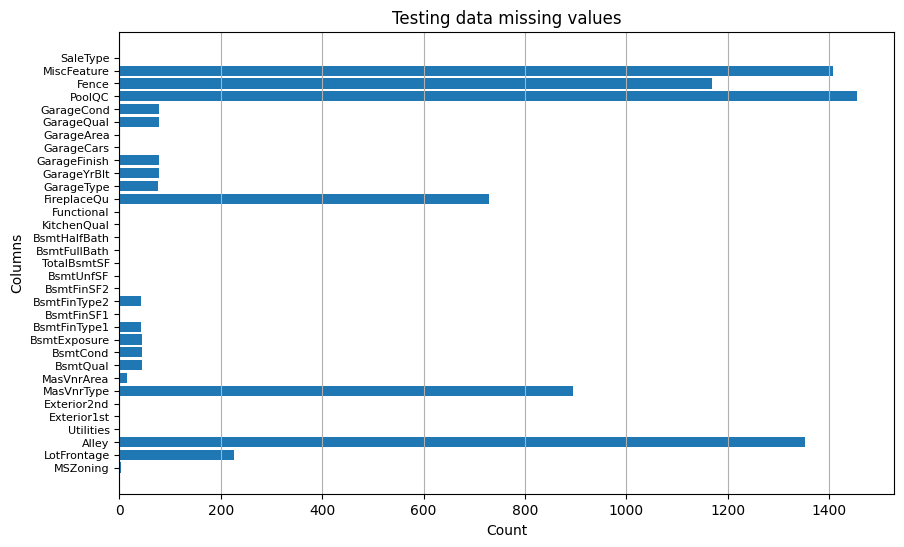

In [8]:
plt.figure(figsize=(10,6))
plt.barh(testNanList.index, testNanList)
plt.title('Testing data missing values')
plt.xlabel('Count')
plt.yticks(fontsize=8)
plt.ylabel('Columns')
plt.grid(axis='x')
plt.show()

Seems like the missing values related to the house doesn't have that corresponding feature. Therefore we can just let them be by imputing the missing values with 'no' since all the missing values likely to be in the categorical values

In [9]:
trainCategoricalCols = dfTrain.select_dtypes(exclude='number').columns.to_list()
trainNumericalCols = dfTrain.select_dtypes(include='number').columns.to_list()

testCategoricalCols = dfTest.select_dtypes(exclude='number').columns.to_list()
testNumericalCols = dfTest.select_dtypes(include='number').columns.to_list()

In [10]:
dfTrain[trainCategoricalCols] = dfTrain[trainCategoricalCols].fillna('no')
dfTrain[trainNumericalCols] = dfTrain[trainNumericalCols].fillna(0) 

In [11]:
dfTest[testCategoricalCols] = dfTest[testCategoricalCols].fillna('no')
dfTest[testNumericalCols] = dfTest[testNumericalCols].fillna(0)

## Categorical values visualization

Since we handle a dataset full with categorical values, we need to visualize it for the sake of data understanding lmao. However, we dont need to know the insight of the test dataset (because it's a test dataset, why would you explore the test dataset!!1!1!!11!! That's why we call it test dataset lmao)

### Training data

In [12]:
trainCategoricalCols = dfTrain.select_dtypes(exclude='number').columns.to_list()
print(trainCategoricalCols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


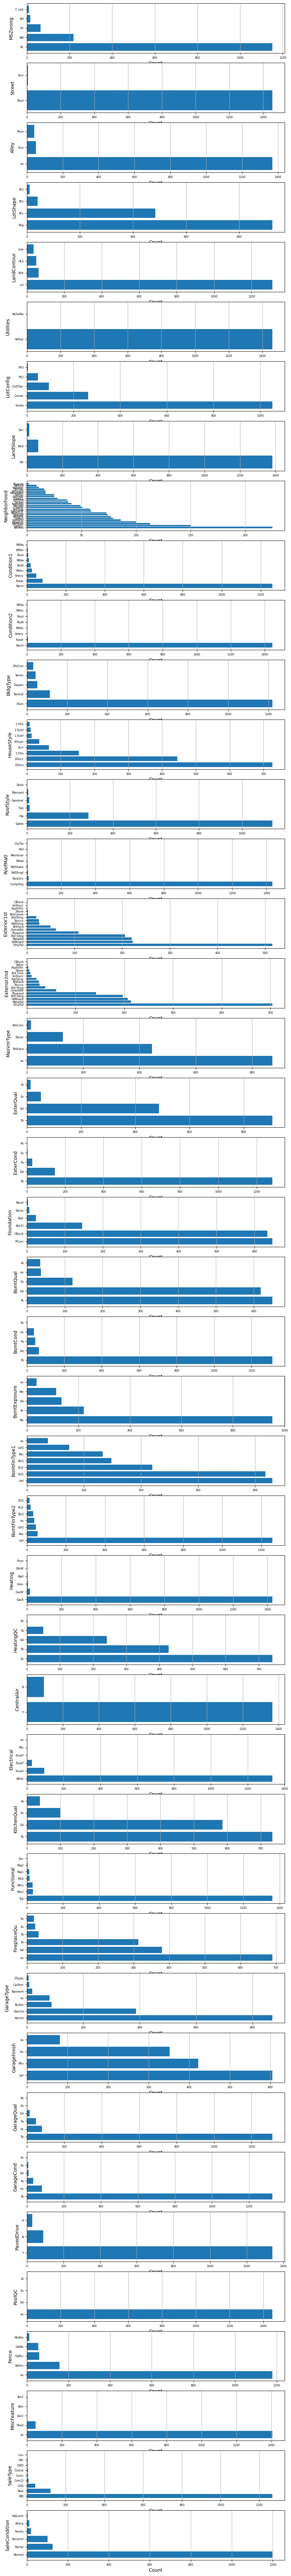

In [13]:
fig, ax = plt.subplots(len(trainCategoricalCols), 1,figsize=(10,100))

for i, cols in enumerate(trainCategoricalCols):
    ax[i].barh(dfTrain[cols].value_counts().index, dfTrain[cols].value_counts().values)
    ax[i].set_ylabel(trainCategoricalCols[i])
    ax[i].tick_params(labelsize=6)
    ax[i].set_xlabel('Count')
    ax[i].grid(axis='x')

Based on SaleCondition visualization, lets see the exact number

In [14]:
dfTrain.groupby('SaleCondition').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
SaleCondition,,,,,,,,,,,,,,,,,,,,,
Abnorml,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
AdjLand,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Alloca,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Family,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Normal,1198,1198,1198,1198,1198,1198,1198,1198,1198,1198,...,1198,1198,1198,1198,1198,1198,1198,1198,1198,1198
Partial,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125


Focused on the Normal SaleCondition and see PoolQC col above, there're 3 house that has a pool. Let's see the pool quality

In [15]:
dfTrain.groupby(['SaleCondition', 'PoolQC']).count()

Id  MSSubClass  MSZoning  LotFrontage  LotArea   
SaleCondition PoolQC                                                     
Abnorml       Ex         2           2         2            2        2  \
              no        99          99        99           99       99   
AdjLand       no         4           4         4            4        4   
Alloca        Gd         1           1         1            1        1   
              no        11          11        11           11       11   
Family        no        20          20        20           20       20   
Normal        Fa         2           2         2            2        2   
              Gd         1           1         1            1        1   
              no      1195        1195      1195         1195     1195   
Partial       Gd         1           1         1            1        1   
              no       124         124       124          124      124   

                      Street  Alley  LotShape  LandContour  Utilities  ...   
SaleCondition PoolQC                                                   ...   
Abnorml       Ex           2      2         2            2          2  ...  \
              no          99     99        99           99         99  ...   
AdjLand       no           4      4         4            4          4  ...   
Alloca        Gd           1      1         1            1          1  ...   
              no          11     11        11           11         11  ...   
Family        no          20     20        20           20         20  ...   
Normal        Fa           2      2         2            2          2  ...   
              Gd           1      1         1            1          1  ...   
              no        1195   1195      1195         1195       1195  ...   
Partial       Gd           1      1         1            1          1  ...   
              no         124    124       124          124        124  ...   

                      3SsnPorch  ScreenPorch  PoolArea  Fence  MiscFeature   
SaleCondition PoolQC                                                         
Abnorml       Ex              2            2         2      2            2  \
              no             99           99        99     99           99   
AdjLand       no              4            4         4      4            4   
Alloca        Gd              1            1         1      1            1   
              no             11           11        11     11           11   
Family        no             20           20        20     20           20   
Normal        Fa              2            2         2      2            2   
              Gd              1            1         1      1            1   
              no           1195         1195      1195   1195         1195   
Partial       Gd              1            1         1      1            1   
              no            124          124       124    124          124   

                      MiscVal  MoSold  YrSold  SaleType  SalePrice  
SaleCondition PoolQC                                                
Abnorml       Ex            2       2       2         2          2  
              no           99      99      99        99         99  
AdjLand       no            4       4       4         4          4  
Alloca        Gd            1       1       1         1          1  
              no           11      11      11        11         11  
Family        no           20      20      20        20         20  
Normal        Fa            2       2       2         2          2  
              Gd            1       1       1         1          1  
              no         1195    1195    1195      1195       1195  
Partial       Gd            1       1       1         1          1  
              no          124     124     124       124        124  

[11 rows x 79 columns]

Based on the data above, Seems like Pool quality didn't affect the SaleCondition that much. Let's see the neighborhood cols below

In [16]:
with pd.option_context('display.max_rows', None):
    display(dfTrain.groupby(['Neighborhood', 'SaleCondition']).count().sort_values(by='Id', ascending=False))

,,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
Neighborhood,SaleCondition,,,,,,,,,,,,,,,,,,,,,
NAmes,Normal,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
CollgCr,Normal,129,129,129,129,129,129,129,129,129,129,...,129,129,129,129,129,129,129,129,129,129
OldTown,Normal,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
Edwards,Normal,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
Sawyer,Normal,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
Gilbert,Normal,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
NWAmes,Normal,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
BrkSide,Normal,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
SawyerW,Normal,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


Based on the data above, seems like there're so many peoples buying a property on NAmes and CollgCr. However, i feel like this approach are exhaustive to analyze the data row by row.

Lets check the correlation heatmap to see the correlated columns. Since the correlation heatmap only takes number as the data, we need to encode all the categorical values using LabelEncoder because the datasets it self already has 80 columns and its kinda too wide and harsh to use one-hot encoding, however we might use the one-hot encoding for experimental purpose later

In [17]:
LE = LabelEncoder()
for cols in trainCategoricalCols:
    dfTrain[cols] = LE.fit_transform(dfTrain[cols])

#Since we're gonna use the test dataset to test the model later, we also need to encode the categorical columns on the test dataset
testCategoricalCols = dfTest.select_dtypes(exclude='number').columns.to_list()
for cols in testCategoricalCols:
    dfTest[cols] = LE.fit_transform(dfTest[cols])

to make sure the categorical values was encoded, lets check it

In [18]:
dfTrain[trainCategoricalCols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,1,1,4,4,2,3,4,4,8,4
1456,3,1,2,3,3,0,4,0,14,2,...,1,2,4,4,2,3,2,4,8,4
1457,3,1,2,3,3,0,4,0,6,2,...,1,1,4,4,2,3,0,2,8,4
1458,3,1,2,3,3,0,4,0,12,2,...,1,2,4,4,2,3,4,4,8,4


In [19]:
dfTest[testCategoricalCols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,1,2,3,3,0,4,0,12,1,...,1,2,3,4,2,2,2,3,8,4
1,3,1,2,0,3,0,0,0,12,2,...,1,2,3,4,2,2,4,0,8,4
2,3,1,2,0,3,0,4,0,8,2,...,1,0,3,4,2,2,2,3,8,4
3,3,1,2,0,3,0,4,0,8,2,...,1,0,3,4,2,2,4,3,8,4
4,3,1,2,0,1,0,4,0,22,2,...,1,1,3,4,2,2,4,3,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,2,3,3,0,4,0,10,2,...,6,3,4,5,2,2,4,3,8,4
1455,4,1,2,3,3,0,4,0,10,2,...,4,2,3,4,2,2,4,3,8,0
1456,3,1,2,3,3,0,4,0,11,2,...,5,2,3,4,2,2,4,3,8,0
1457,3,1,2,3,3,0,4,0,11,2,...,6,3,4,5,2,2,2,2,8,4


Voilaaa, no messy text values lmao

Ok lets do the correlation heatmap

<Axes: >

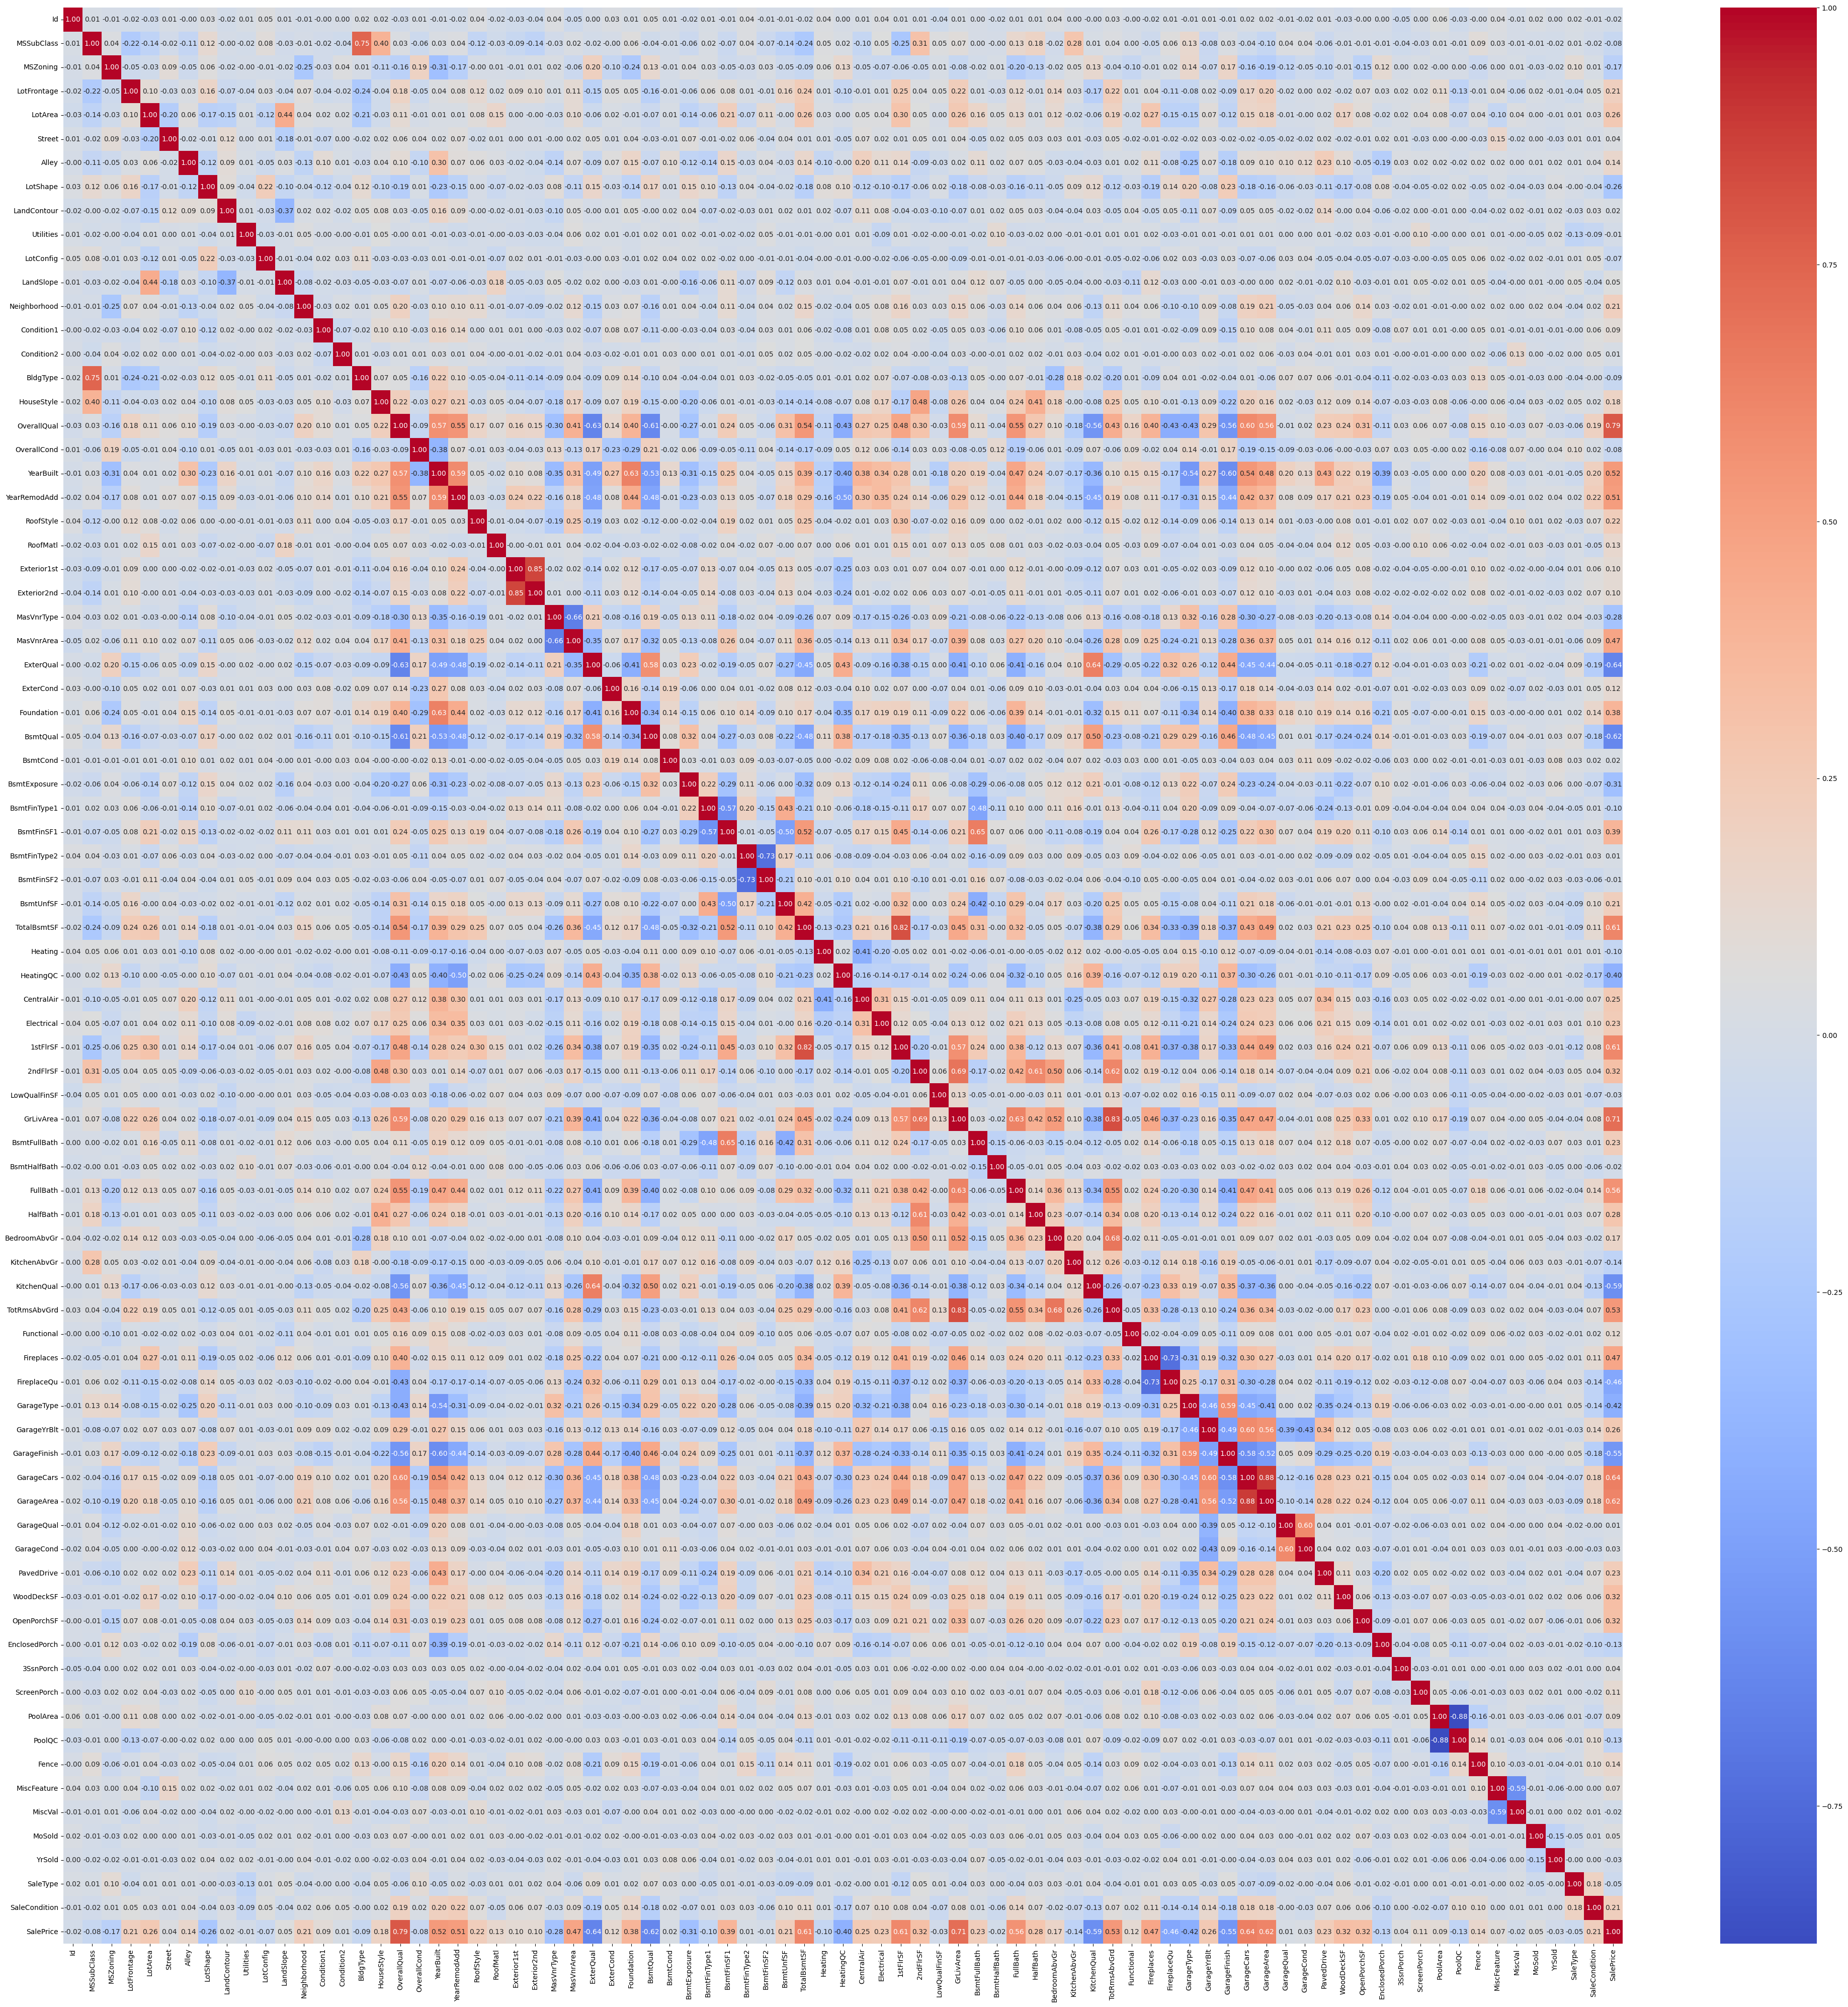

In [20]:
trainCorr = dfTrain.corr()
plt.figure(figsize=(50,50))
sns.heatmap(trainCorr, annot=True, fmt='.2f', cmap='coolwarm')

Look at the heatmap, what a messy figure lmao. However, let's focus on SalePrice column against all other columns, there're so many columns that has high correlation value. Therefore, we take those corresponding columns to fed it to our model. Our hypothesize, the model will have a better r2 score than using all the columns because we're using the high correlated columns and ignore the other noise column/values. However, we might still use all the columns for experimental purposes

Let's take all the > 0.2 correlation values column

In [21]:
targetCols = 'SalePrice'
highCorrCols = trainCorr[trainCorr[targetCols] > 0.2].index.to_list()
highCorrCols.remove('SalePrice')
print(highCorrCols)

['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']


Okay, since we already have all the high correlated columns. LET THE MODELLING BEGIN!!!11!!1!1

## Modelling

Before we start the training process, let's define a function to do the training and evaluation process to make the code a bit cleaner

In [32]:
def getTrain(xTrain, xVal, yTrain, yVal):
    linReg = LinearRegression()
    linReg.fit(xTrain, yTrain)
    #training
    trainPreds = linReg.predict(xTrain)
    trainr2score = r2_score(yTrain, trainPreds)
    trainmae = mean_absolute_error(yTrain, trainPreds)
    print(f"This model training phase achieveing R2 Score : {trainr2score:.2f} and MAE : {trainmae:.2f}")
    #validation
    preds = linReg.predict(xVal)
    r2score = r2_score(y_true=yVal, y_pred=preds)
    mae = mean_absolute_error(y_true=yVal, y_pred=preds)
    print(f"This model achieving R2 Score : {r2score:.2f} and MAE : {mae:.2f}")
    return (linReg, preds)

We split the dataset into 3 parts consists of training, validation, and testing. Where training and validation using the training dataset and the testing dataset for the test part. On the training and validation split we're using 70:30 ratio and might be changed for experimental purpose.

In [23]:
xTrain, xVal, yTrain, yVal = train_test_split(dfTrain[highCorrCols], dfTrain['SalePrice'], test_size=0.3, random_state=17)

In [33]:
model, preds = getTrain(xTrain, xVal, yTrain, yVal)

This model training phase achieveing R2 Score : 0.79 and MAE : 21808.92
This model achieving R2 Score : 0.83 and MAE : 22119.90


As you can see above, the result was surprisingly kinda good and the model doesn't overfit

Let's see the result by displaying side by side the prediction and validation data

In [34]:
sbs = pd.DataFrame({
    'Prediction' : preds,
    'RealClass' : yVal.values
})
sbs.head()

,Prediction,RealClass
0,152007.732842,140000
1,244670.662823,260000
2,227096.374205,253000
3,272955.586824,227000
4,220208.626508,217000


The difference between the prediction and the actual value was kinda bit off but let's consider it as good enough :D

## Experimental